In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [13]:
df = pd.read_csv('./Data/ramadan_donation_spending.csv')
df.head(
)

,days,daily_income,number_of_appeals,is_friday,days_until_eid,income_appeals_interaction,donation_spending
0,1,126.584655,3,0,29,379.753964,86.034463
1,2,239.312530,3,0,28,717.937591,89.795147
2,3,204.221262,5,0,27,1021.106309,96.198619
3,4,135.620207,5,0,26,678.101033,91.618039
4,5,82.334829,5,1,25,411.674143,108.887326


In [14]:
X = df[['daily_income','number_of_appeals','number_of_appeals','days_until_eid','income_appeals_interaction']]
y = df['donation_spending']

In [15]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [16]:
model.coef_

array([ 0.51451642, 12.51346304, 12.51346304,  0.30108488, -0.13843468])

In [17]:
model.intercept_

-5.339658607596164

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


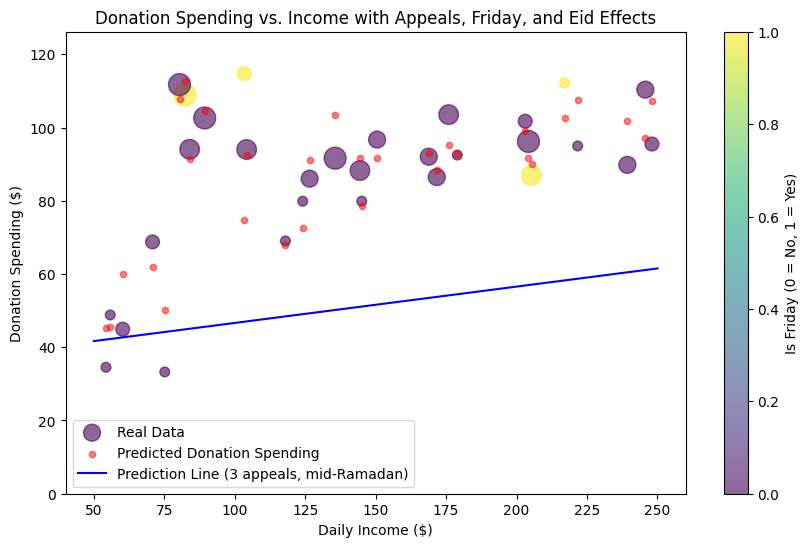

In [18]:

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df["daily_income"],
    df["donation_spending"],
    c=df["is_friday"],
    s=df["number_of_appeals"] * 50,
    alpha=0.6,
    cmap="viridis",
    label="Real Data"
)
plt.scatter(
    df["daily_income"],
    model.predict(X),
    color="red",
    s=20,
    label="Predicted Donation Spending",
    alpha=0.5
)
income_range = np.linspace(50, 250, 100)
X_line = np.array([income_range, np.full(100, 3), np.zeros(100), np.full(100, 15), income_range * 3]).T
plt.plot(income_range, model.predict(X_line), "b-", label="Prediction Line (3 appeals, mid-Ramadan)")
plt.xlabel("Daily Income ($)")
plt.ylabel("Donation Spending ($)")
plt.title("Donation Spending vs. Income with Appeals, Friday, and Eid Effects")
plt.colorbar(scatter, label="Is Friday (0 = No, 1 = Yes)")
plt.legend()
plt.ylim(0, max(df["donation_spending"]) * 1.1)
plt.show()